# Multivariate Thinking

Explore multivariate relationships using multiple regression to describe non-linear relationships and logistic regression to explain and predict binary variables.

In [44]:
# import brfss datasets as DataFrame
import pandas as pd
brfss = pd.read_hdf('C:\\Users\\yazan\\Desktop\\Data_Analytics\\7-Exploratory Data Analysis in Python\\datasets\\brfss.hdf5', 'brfss')
gss = pd.read_hdf('C:\\Users\\yazan\\Desktop\\Data_Analytics\\7-Exploratory Data Analysis in Python\\datasets\\gss.hdf5', 'gss')

# 1. Limits of simple regression

1.1 Regression and causation

In the BRFSS dataset, there is a strong relationship between vegetable consumption and income. The income of people who eat 8 servings of vegetables per day is double the income of people who eat none, on average.

Which of the following conclusions can we draw from this data?

A. Eating a good diet leads to better health and higher income.

B. People with higher income can afford a better diet.

C. People with high income are more likely to be vegetarians.

Answer: is none of above, because this data is consistent with all of these conclusions, but it does not provide conclusive evidence for any of them.

1.2 Using StatsModels

Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.

In [45]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092105022, intercept=1.5287786243363104, rvalue=0.11967005884864104, pvalue=1.3785039162477718e-238, stderr=0.002110976356332333, intercept_stderr=0.013196467544093607)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


As you see in previous example the statsmodels library give us the same answer as scipy library

# 2. Multiple Regression

2.1 Plot income and education

To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called gss.

Intercept   -11539.147837
educ          3586.523659
dtype: float64


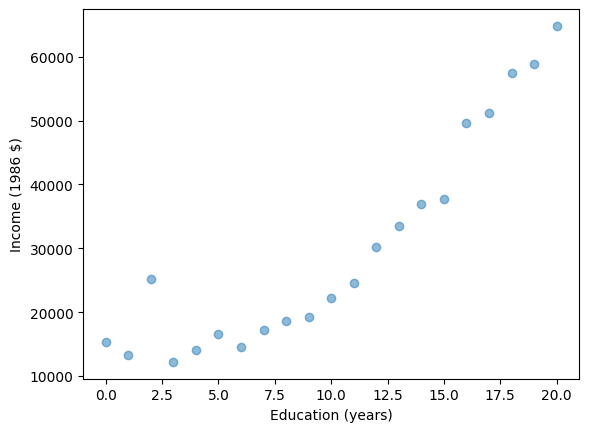

In [46]:
# Import important models
import matplotlib.pyplot as plt

# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ', data=gss).fit()

# Print the estimated parameters
print(results.params)

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

It looks like the relationship between income and education is non-linear.

2.2 Non-linear model of education

The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

In [47]:
# Add a new column with educ squared and age squared
gss['educ2'] = gss['educ']**2
gss['age2'] = gss['age']**2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


The slope associated with educ2 is positive, so the model curves upward.

# 3. Visualizing regression results

3.1 Making predictions

At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding age constant.

In [48]:
# Run a regression model with educ, educ2, age, and age2
model = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
import numpy as np
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred30 = model.predict(df)
print(pred30.head())

# Make the DataFrame
df = pd.DataFrame()
import numpy as np
df['educ'] = np.linspace(0,20)
df['age'] = 50
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred50 = model.predict(df)
print(pred50.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64
0    18601.513804
1    18412.527346
2    18276.840926
3    18194.454545
4    18165.368202
dtype: float64


3.2 Visualizing predictions

Now let's visualize the results from the previous exercise!

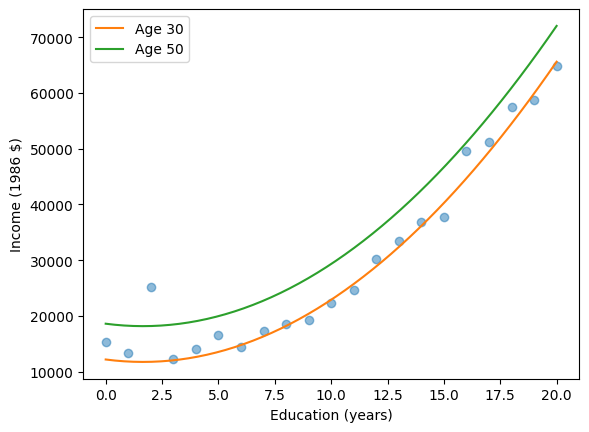

In [49]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred30, label='Age 30')
plt.plot(df['educ'], pred50, label='Age 50')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

as we see in the previous example that our model is more able to predict the income better when the age of people
is equal to 30 years more than 50 years

# 4. Logistic regression

4.1 Predicting a binary variable

Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question "Do you think the use of marijuana should be made legal or not?"

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


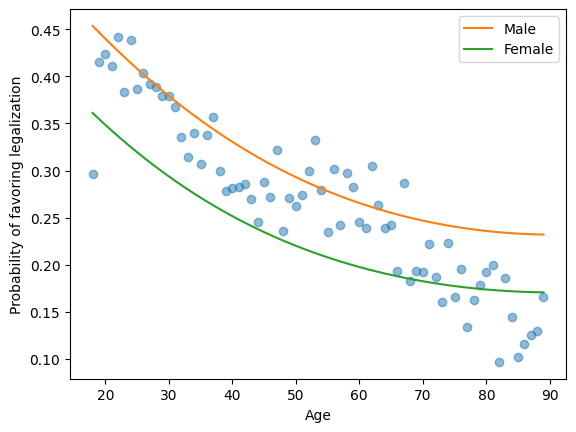

In [50]:
# Fill in the parameters of smf.logit() to predict grass using the variables age, age2, educ, and educ2, along 
# with sex as a categorical variable.

# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Add a column called educ and set it to 12 years; then compute a second column, educ2, which is the square of educ.

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate separate predictions for men and women.
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

# compute the mean of 'grass' for each age group, and then plot pred2 versus df['age'] with the label 'Female'.

# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()